In [1]:
import matplotlib.pyplot as plt
import numpy as np

# just to overwrite default colab style
plt.style.use('default')
plt.style.use('seaborn-talk')

In [30]:
# Linear Regression using Stochastic Gradient Descent
def batchloader(X, Y, batchsize = 32):
    n = Y.shape[0]
    idx = np.random.choice(np.arange(n),size=batchsize,replace=False)
    X_batch = X[idx,:]
    Y_batch = Y[idx,:]
    return X_batch, Y_batch

def softmax(X):
    exps = np.exp(X)
    return exps / np.sum(exps)

def crossEntropy(X, Y, theta):
    fce = 0
    
    n, m = X.shape
    n, p = Y.shape 
    
    for i in range(n):
        Y_pred = softmax(np.dot(X[i],theta))
        fce += np.dot(Y[i].T, np.log(Y_pred))  
    fce *= (-1/n)
    return fce
    
def SGD(X, Y, learning_rate=0.001, epochs=100, batchsize = 32, alpha = 0.01):
    n, m = X.shape
    n, p = Y.shape
    
    w = np.random.randn(m,p)
    b = np.random.randn(1,p)
    
    # preprocessing Data
    X = np.append(X, np.ones((n,1)), axis=1)
    
    n, mpn = X.shape

    COST = np.zeros(epochs)
    ACC = np.zeros(epochs)
    theta = np.append(w, b, axis=0)
    
    for i in range(epochs):
#         alpha *= 0.99
        # Get Batch 
        X_batch, Y_batch = batchloader(X, Y, batchsize) 
        Y_pred = softmax(np.dot(X_batch,theta))
        
        # perform gradient descent
        gradJ = (1/n)*( np.dot(X_batch.T, (Y_pred - Y_batch) )) 
        theta = theta - learning_rate * gradJ - alpha*np.append(w,np.zeros((1,p)),axis=0)
         
        w = theta[:m,:p]    

        # get cost
        COST[i] = crossEntropy(X_batch, Y_batch, theta)
        acc = accuracy(Y_pred, Y_batch)
        ACC[i] = acc
        
    return theta, COST, ACC 
    
def accuracy(Y_pred, Y):
    n,p = Y.shape
    acc = np.sum([np.argmax(Y_pred[i])==np.argmax(Y[i]) for i in range(n)])/(0.01*n)
    return acc

In [31]:
# Load data
Xtr = np.load("mnist_train_images.npy")
n = Xtr.shape[0]
Xtr = Xtr.reshape((n,-1))
Ytr = np.load("mnist_train_labels.npy")

# Get Validation Set
Xv = np.load("mnist_validation_images.npy")
nv = Xv.shape[0]
Xv = Xv.reshape((nv,-1)) # feature vector is row vector 
Yv = np.load("mnist_validation_labels.npy")

# preprocessing on validation set 
Xv = np.append(Xv, np.ones((nv,1)), axis=1)

# Tune Hyper parameter
LR = [0.01, 0.05, 0.5, 1]
EPOCHS = [50, 100, 50, 50]
BATCHSIZE = [32, 64, 128, 256]
ALPHA = [0.000001, 0.000002, 0.000005, 0.00001]

np.random.seed(1)
cost = 1000000
iter = 0
epochs_ = 200

for lr_ in LR:
#     for epochs_ in EPOCHS:
    for bs_ in BATCHSIZE:
        for alpha_ in ALPHA:
            theta, COST, ACC = SGD(Xtr, Ytr, learning_rate=lr_, epochs=epochs_, batchsize=bs_, alpha=alpha_) 

            Y_pred = softmax(np.dot(Xv, theta))
            accu = accuracy(Y_pred, Yv)
            loss = COST[-1]
            print("iter: ", iter, ", accuracy: ", accu ,", loss: ", COST[-1])
            iter += 1 

            if(loss<cost):
                lr = lr_
                epochs = epochs_
                bs = bs_
                alpha = alpha_
                cost=loss
                    
print('learning rate: ', lr, ', Epochs: ', epochs, ', mini-batchsize (in %): ', bs, ', alpha: ', alpha)                    

iter:  0 , accuracy:  5.98 , loss:  15.949594861208832
iter:  1 , accuracy:  5.98 , loss:  15.943417537453605
iter:  2 , accuracy:  5.96 , loss:  15.924900700114524
iter:  3 , accuracy:  5.96 , loss:  15.89408969371352
iter:  4 , accuracy:  5.98 , loss:  18.361512073151196
iter:  5 , accuracy:  5.98 , loss:  18.35438236287943
iter:  6 , accuracy:  5.98 , loss:  18.333010664608913
iter:  7 , accuracy:  5.96 , loss:  18.297449209183622
iter:  8 , accuracy:  5.98 , loss:  17.915640950386464
iter:  9 , accuracy:  5.98 , loss:  17.908688604169136
iter:  10 , accuracy:  5.98 , loss:  17.887848588278455
iter:  11 , accuracy:  5.98 , loss:  17.85317190565003
iter:  12 , accuracy:  5.98 , loss:  17.29309705079694
iter:  13 , accuracy:  5.98 , loss:  17.286394534875583
iter:  14 , accuracy:  5.98 , loss:  17.266303401374376
iter:  15 , accuracy:  5.98 , loss:  17.23287282987321
iter:  16 , accuracy:  5.98 , loss:  15.943065335028708
iter:  17 , accuracy:  5.98 , loss:  15.936889348634192
iter:  

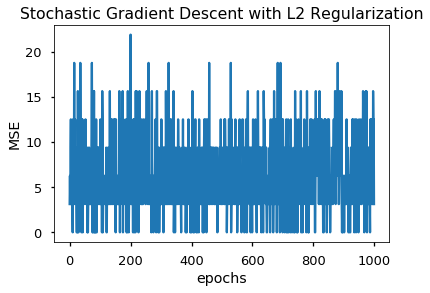

accuracy 6.93
MSE on test data:  16.96642405668906
Tuned Hyperparameters: 
learning rate:  1 , Epochs:  1000 , mini-batchsize (in %):  32 , alpha:  1e-05


In [29]:
epochs = 1000

# Training on tuned hyperparameters
theta, COST, ACC = SGD(Xtr, Ytr, learning_rate=lr, epochs=epochs, batchsize=bs, alpha=alpha)

plt.plot(ACC)
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Stochastic Gradient Descent with L2 Regularization')
plt.show()

# Testing 
X_te = np.load("mnist_test_images.npy")
n = X_te.shape[0]
X_te = X_te.reshape((n,-1))

# preprocessing Data
X_te = np.append(X_te, np.ones((n,1)), axis=1)
yte = np.load("mnist_test_labels.npy")

MSE_test = crossEntropy(X_te, yte, theta)
Y_pred = softmax(np.dot(X_te, theta))
accu = accuracy(Y_pred, yte)

print('accuracy', accu)
print('MSE on test data: ', MSE_test)
print('Tuned Hyperparameters: ')
print('learning rate: ', lr, ', Epochs: ', epochs, ', mini-batchsize (in %): ', bs, ', alpha: ', alpha)